# Boston House Price Prediction Model
### *Using Linear Regression Algorithm*

##  *done by*  ARCHISHMAN GHOSH

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

# Data Processing
## Loading Dataset

In [3]:
boston = load_boston()
#description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# PUT THE DATA INTO PANDAS DATA FRAMES
features = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
#Target dataset
target = pd.DataFrame(boston.target, columns=['Target'])

In [6]:
#Finding min & max prices of houses
#Syntax : max(dataframe_object[column_name])
max(target['Target'])

50.0

In [7]:
min(target['Target'])

5.0

#### concatenate features and target into a single DataFrame

In [8]:
#axis=1 makes it concatenate column wise (default is 0, i.e., row wise )
#Syntax : pandas.concat(objs,axis=0)
df = pd.concat([features,target],axis=1)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Visualisation of BH Data
##### Generation of descriptive statistics that summarize the central tendency, dispertion and shape of the dataset's distribution

In [9]:
# Syntax : DataFrame.describe()
# round(decimals=2) sets the precision to 2 decimal places
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Correlation between Target and Attributes

In [10]:
# Calculate correlation between every column on the data
# syntax : DataFrame.corr(method='pearson')
corr = df.corr('pearson')

#Take absolute values of correlations
corrs = [abs(corr[attr]['Target']) for attr in list(features)]

#Make list of pairs [(corrs,features)]
l = list(zip(corrs,list(features)))

#sort the list of pairs in descending order with the correlation value as key for sorting
l.sort(key=lambda x:x[0], reverse=True)

#unzip pairs to two lists
#zip(*l) takes a list that looks like [[a,b,c],[d,e,f],[g,h,i]] and returns [[a,d,g],[b,e,h],[c,f,i]]
corrs, labels = list(zip(*l))


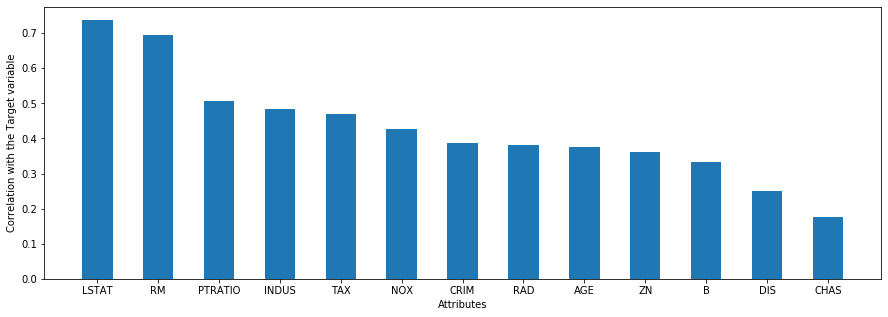

In [11]:
#plot the correlations with respect to the target variables as a bar graph
#Syntax : matplotlib.pyplot.bar(x,height,width=0.8,bottom=none,allign='center')
index = np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the Target variable')
plt.xticks(index,labels)
plt.show()

## Normalize the Data
#### Normalize using MinMaxScaler

In [12]:
X = df['LSTAT'].values
Y = df['Target'].values

#Before Normalization :
print('X=',X[:5])
print('Y=',Y[:5])

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[:,-1]

y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[:,-1]

#After Normalization :
print('X=',X[:5])
print('Y=',Y[:5])

X= [4.98 9.14 4.03 2.94 5.33]
Y= [24.  21.6 34.7 33.4 36.2]
X= [0.08967991 0.2044702  0.06346578 0.03338852 0.09933775]
Y= [0.42222222 0.36888889 0.66       0.63111111 0.69333333]


## Splitting the Data

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2)
# 0.2 indicates 20% of the data is randomly sampled as testing data

# Model Design

## We have 3 functions constituting the model :
####         1. Error function : Calculates the cost/loss function at current position.
####         2. Update function : Calculates the gradients at current pos. and updates the values of m & c.
####         3. Gradient_descent function : Applies Gradient Descent Algorithm on the cost function and obtains the best fit values for m & c.

### 1. Error
This function gives the error which we need to reduce over the course of training.

                        squared_error = summation( (predicted - true)^2 )
                        mean_squared_error = squared_error * 1/(2*N)

In [14]:
def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e*1/(2*N)

### 2. Update
Gradients of m & c are calculated in this function.
            
                    grad_m = summation( 2*((m*x+c)-t)*x )
                    grad_c = summation( 2*((m*x+c)-t) )
                    
The grad_m & grad_c are calculated as vectorised operations.

The updated values of m & c are calculated as -

                    m = m - grad_m * learning_rate
                    c = c - grad_c * learning_rate

In [15]:
def update(m,x,c,t,learning_rate):
    grad_m = sum(2*((m*x+c)-t)*x)
    grad_c = sum(2*((m*x+c)-t))
    m = m - grad_m*learning_rate
    c = c - grad_c*learning_rate
    return m,c

### 3. Gradient_descent
**Error threshold** : If the error falls below error threshold, the gradient descent is stopped and the weights are returned.

The initial values of m & c are provided to the gradient_descent func as init_m & init_c .

In [16]:
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m=init_m
    c=init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m,x,c,t)
        if e<error_threshold:
            print('Error less than threshold. Stopping gradient_descent.')
            break
        error_values.append(e)
        m,c = update(m,x,c,t,learning_rate)
    return m,c,error_values,mc_values

### The  parameters  may  be  changed  to  varied  to  observe  the  computation  vs  accuracy  trade-offs. 
**Learning  Rate**  :  Increasing  the  learning  rate  reduces  the  convergence  time.  But.  the  learning  rate  is  too  high  the  model overshoot  the  minima. 

**Iterations** :  Number  of  iterations  must  be  large  enough  to  allow  the  model  to  converge  to  a  minima,  but  if  it  is  too  large, then  the  model  becomes  too  specific  to  the  training  data  thus  causing  overfitting.  i.e,  the  model  "memorizes"  the  data instead  of  "learning"  the  data.
For  this  dataset,  if  you  set  the  learning  rate  above  0.0025.  it  causes  overflow.  Reduce  the  learning  rate  and  observe  the error  values. 

**Error  threshold**  :  This  value  can  be  set  to  a  maximum  value  of  error  that  is  acceptable  When  the  error  value  goes  below the  threshold,  the  gradient  descent  is  stopped.

**Initial  values**  :  For  this  problem  where  our  objective  is  to  determine  the  line  which  gives  the  least  error,  it  does  not  matter what  initial  values  you  provide.  But.  for  non-convex  optimization  problems,  initial  values  affect  the  learning  process.  We will  elborate  on  this  when  we  learn  neural  networks

In [17]:
%%time
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001

m,c,error_values,mc_values = gradient_descent(init_m,init_c,xtrain,ytrain,learning_rate,iterations,error_threshold)

Wall time: 248 ms


# Visualization of the Learning Process

1.  **Plot  the  regression  line**  against  the  training  data  set  to  vizualize  what  the  line  looks  like  for  the  training  data  set
2.  **Plot  the  error  values:**  This  graph  will  show  you  how  the  error  drops  over  time
3.  **Plot  the  change  in  regression  line  throught  the  training  process.**  This  graph  helps  you  vizualize  how  m  and  c values are  updale  after  each  step. Plotting  the  regression  line  upon  the  training  data  set

### Plotting the regression line upon the training data set.

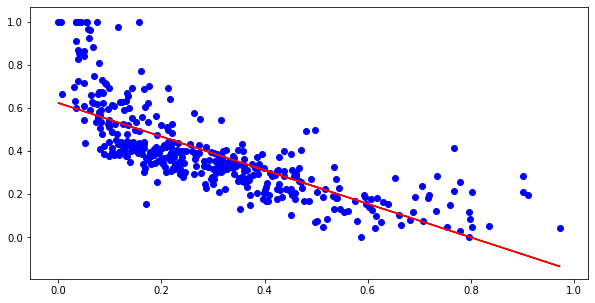

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(xtrain,ytrain,color='b')
plt.plot(xtrain,(m*xtrain+c),color='r')

### Plotting error values

Text(0.5, 0, 'Iteration')

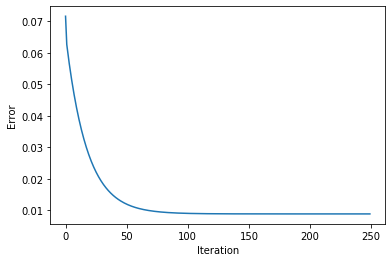

In [19]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iteration')

## Animated view of the change in regression line throught the training process
As the number of inerations increases, changes in the line are less noticable.

In order to reduce the processing time for animation, we are choosing every 5th value of m,c.

But a smaller interval will smoothen the animation better, while increasing the processing time.

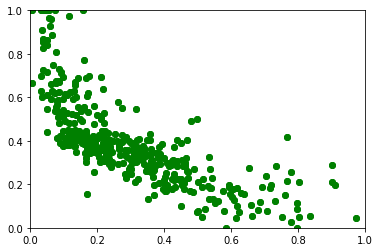

In [28]:
mc_values_anim = mc_values[0:250:5]

fig,ax = plt.subplots()
ln = plt.plot([],[],'ro-',animated=True)

# init function purpose :-
# -callback func to initialize the graph
# -training data is drawn such that it is in the background
def init():
    plt.scatter(xtrain,ytrain,color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln

# update_frame function purpose :-
# -update each frame
# -compute the end points of the regression line using the m,c values
# parameter : frame - used to index mc_values_anim array
def update_frame(frame):
    m,c = mc_values_anim[frame]
    x1,y1 = -0.5, m*-0.5+c
    x2,y2 = 1.5, m*1.5+c
    ln.set_data([x1,x2],[y1,y2]) #sets the end points of the line
    return ln

anim = FuncAnimation(fig, update_frame, frames=range(len(mc_values_anim)), init_func=init, blit=True)
HTML(anim.to_html5_video())

# Prediction

After obtaining the final values of m & c, using these values we obtain the prediction values for the testing data.

In [21]:
# predicting the targets for the test set as a vectorised operation
predicted = (m*xtest)+c

In [22]:
# computing the MSE for the predicted values on the testing set
mean_squared_error(ytest,predicted)

0.023917556910427448

### Putting the xtest, ytest and predicted values in the same DataFrame to see predicted values alongside testing Dataset

In [23]:
p = pd.DataFrame(list(zip(xtest,ytest,predicted)), columns = ['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.239790,0.373333,0.436598
1,0.418598,0.275556,0.297226
2,1.000000,0.195556,-0.155950
3,0.891004,0.075556,-0.070993
4,0.031733,1.000000,0.598769


### Plot of the predicted values against the target values

    NOTE : 1. Predicted values are represented by red coloured line.
           2. Target values are the blue coloured points.

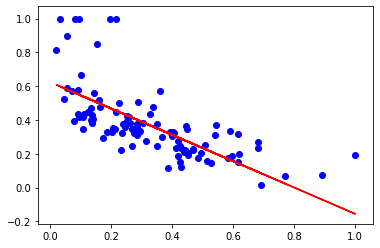

In [24]:
plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,predicted,color='r')

This prediction is in normalized form, thus it does not say the actual price.

## Reverting normalization to obtain predicted price of houses in dollars.

We are using inverse_transform() to scale the values back to original representation.

In [25]:
# Reshaping the data to the shape required by the scalar
predicted = predicted.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

# removing the extra dimension
xtest_scaled = xtest_scaled[:,-1]
ytest_scaled = ytest_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]

p = pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)), columns = ['x','target_y','predicted_y'])
p = p.round(decimals=2)
p.head()

,x,target_y,predicted_y
0,10.42,21.8,24.65
1,16.90,17.4,18.38
2,37.97,13.8,-2.02
3,34.02,8.4,1.81
4,2.88,50.0,31.94
